Project 

# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
data = pd.read_csv("Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory data analysis

In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no null/missing values in this data

In [8]:
#Customer churn count
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data visualisation

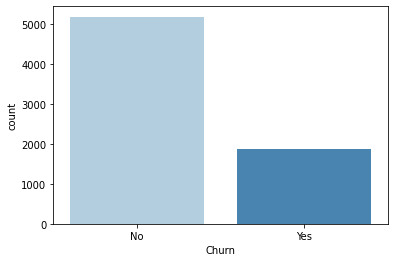

In [9]:
sns.countplot(data.Churn,palette="Blues");

#### From the above plot, it's clear that the number of customers who churned is lesser than the customers who did not churn

In [10]:
#Percentage of customers who churned and not churned 

churned = data[data['Churn']=='Yes'].shape[0]
not_churned = data[data['Churn']=='No'].shape[0]

print("Percentage of customers who stayed: {:.2f}%".format((not_churned/(churned+not_churned))*100))
print("Percentage of customers who left: {:.2f}%".format((churned/(churned+not_churned))*100))

Percentage of customers who stayed: 73.46%
Percentage of customers who left: 26.54%


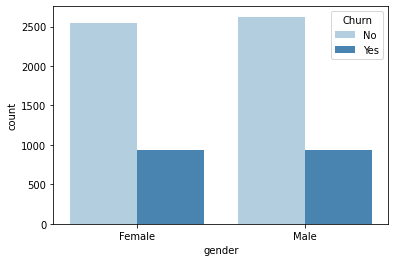

In [11]:
sns.countplot(x="gender",hue="Churn",data=data,palette="Blues");

#### In the above graph, there is not much difference in the churn count between the male and the female gender.

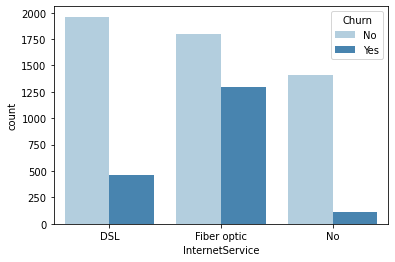

In [12]:
sns.countplot(x="InternetService",hue="Churn",data=data,palette="Blues");

#### The highest no. of customers who did not churn use the DSL Internet Service
#### The highest no. of customers who did churn used the Fiber Optic Internet Service

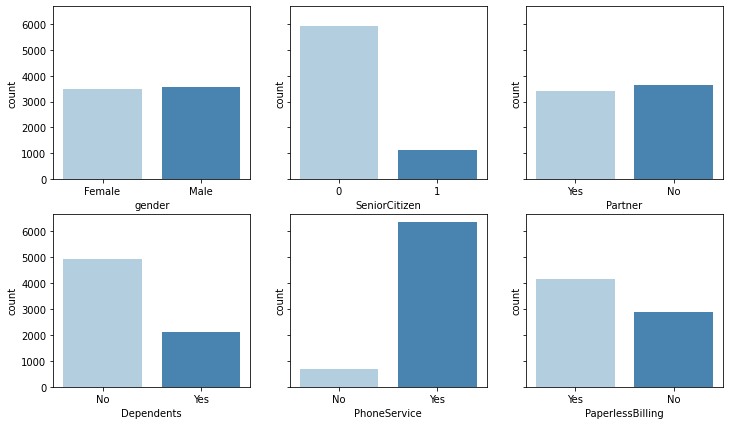

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=data, ax=axes[0,0],palette="Blues");
sns.countplot("SeniorCitizen", data=data, ax=axes[0,1],palette="Blues");
sns.countplot("Partner", data=data, ax=axes[0,2],palette="Blues");
sns.countplot("Dependents", data=data, ax=axes[1,0],palette="Blues");
sns.countplot("PhoneService", data=data, ax=axes[1,1],palette="Blues");
sns.countplot("PaperlessBilling", data=data, ax=axes[1,2],palette="Blues");

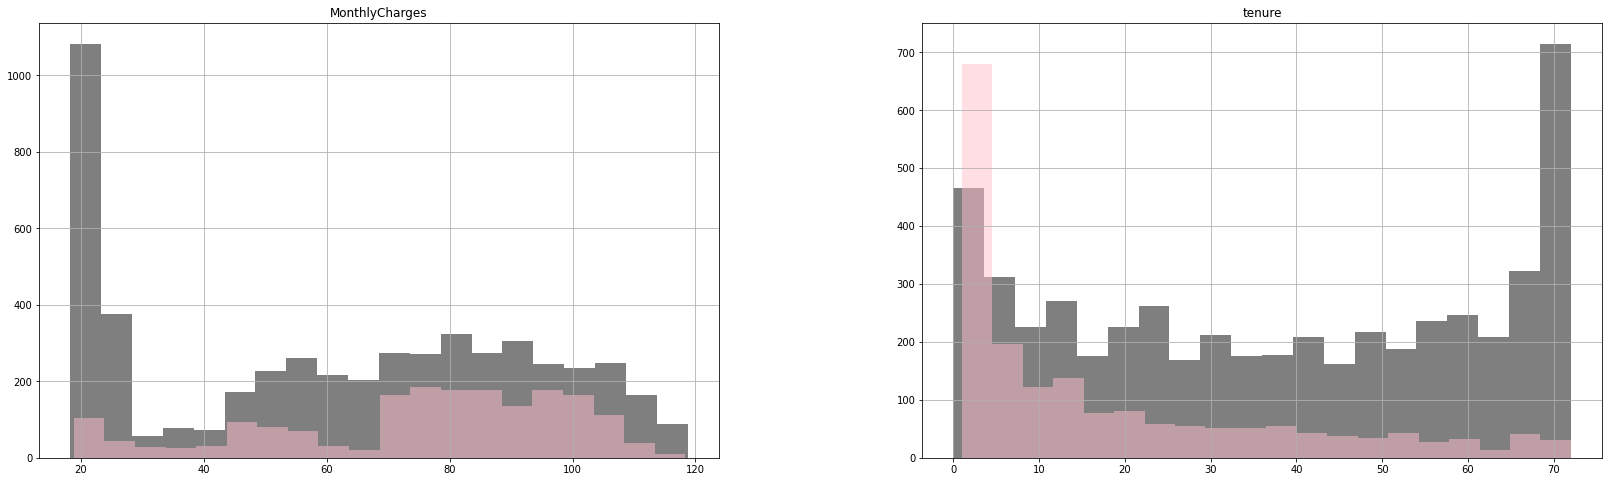

In [14]:
numerical_features = ['tenure', 'MonthlyCharges']

fig, ax = plt.subplots(1, 2,figsize=(28,8)) 
data[data.Churn == 'No'][numerical_features].hist(bins=20, color='black', alpha=0.5, ax = ax);
data[data.Churn == 'Yes'][numerical_features].hist(bins=20, color='pink', alpha=0.5, ax = ax);

In [15]:
#cleaning data dropping unwanted columns
data = data.drop('customerID',axis=1)
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
#convert categorical variables into numeric variables
from sklearn.preprocessing import LabelEncoder
df = data.copy()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [18]:
df.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

## Building model

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X= df.drop("Churn",axis=1)
y = df.Churn
X = StandardScaler().fit_transform(X)

In [20]:
#Splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc = lr.score(X_test,y_test)
print("Accuracy: {:,.2f}".format(acc*100),"%\n")
print(classification_report(y_test,y_pred))

Accuracy: 81.41 %

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



### Random Forest Classififer

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model1 = rfc.fit(X_train,y_train) 
y_pred1 = model1.predict(X_test)

acc1 = rfc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc1*100),"%")

Accuracy: 79.63  %


### Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
model2 = gbc.fit(X_train,y_train) 
y_pred2 = model2.predict(X_test)

acc2 = gbc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc2*100),"%")

Accuracy: 80.98  %


#### The Accuracy obtained from the Logistic Regression model is 81.41% which is the highest numeric accuracy achieved from this Customer Churn Prediction.